In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
import matplotlib.pylab as pylab
import math,time
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from keras.layers import Bidirectional
test_set_size_percentage = 20 
import pandas as pd
from pandas import read_csv
from sklearn.metrics import r2_score,mean_squared_error 

Using TensorFlow backend.


In [2]:
data=pd.read_csv('dataset/irondata.csv',parse_dates=['date'])

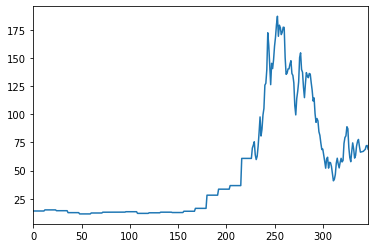

In [3]:
data['price'].plot()
data['price_lag']=data['price'].shift(1)
data=data.set_index('date')
data['rolling_mean_price']=data['price_lag'].rolling(2, min_periods=1).sum()
data=data.dropna()

In [4]:
# function for min-max normalization of Iron Ore 
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
def normalize_data(df):
    df['price'] = min_max_scaler.fit_transform(df.price.values.reshape(-1,1))
    df['price_lag'] = min_max_scaler.fit_transform(df.price_lag.values.reshape(-1,1))
    df['rolling_mean_price'] = min_max_scaler.fit_transform(df.rolling_mean_price.values.reshape(-1,1))
    return df

In [5]:
# normalize stock
df = data.copy()
df = normalize_data(df)
df.head()

,price,price_lag,rolling_mean_price
date,,,
1990-02-28,0.014795,0.014795,0.000000
1990-03-31,0.014795,0.014795,0.039829
1990-04-30,0.014795,0.014795,0.039829
1990-05-31,0.014795,0.014795,0.039829
1990-06-30,0.014795,0.014795,0.039829


In [6]:
train=df[:335]

In [7]:
train.tail()

,price,price_lag,rolling_mean_price
date,,,
2017-08-31,0.359301,0.314630,0.313386
2017-09-30,0.328857,0.359301,0.360812
2017-10-31,0.282251,0.328857,0.367899
2017-11-30,0.295681,0.282251,0.329516
2017-12-31,0.343083,0.295681,0.312989


In [8]:
train_data_raw = train.as_matrix()

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
x_train = train_data_raw[:-1,1:] #without price column of train
y_train = train_data_raw[:-1,0] #with price column of train

x_forecast = train_data_raw[-1:,1:]
y_forecast = train_data_raw[-1:,0]

In [10]:
x_forecast

array([[0.29568087, 0.312989  ]])

In [11]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_forecast.shape = ', x_forecast.shape)
print('y_forecast.shape ',y_forecast.shape)

x_train.shape =  (334, 2)
y_train.shape =  (334,)
x_forecast.shape =  (1, 2)
y_forecast.shape  (1,)


In [12]:
x_train.shape[0]

334

In [13]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, 1, 2))
#x_train = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
#x_test = x_test.reshape((x_test.shape[0],1,x_test.shape[1]))
#x_forecast = x_forecast.reshape((x_forecast.shape[0],1,x_test.shape[1]))
x_train.shape

(334, 1, 1, 2)

In [14]:
# #d = 0.3
# model = Sequential()

# model.add(Bidirectional(LSTM(64, input_shape=(1,2), return_sequences=True))) #timestamp with 2 feature
# #model.add(Dropout(d))

# model.add(Bidirectional(LSTM(64, input_shape=(1,2), return_sequences=False)))
# #model.add(Dropout(d))

# model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
# model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

# # adam = keras.optimizers.Adam(decay=0.2)

# start = time.time()
# model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
# print("Compilation Time : ", time.time() - start)

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 1, 2)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [15]:
#Fit model with history to check for overfitting
history = model.fit(x_train,y_train,batch_size=1,epochs=80,shuffle=False)


Epoch 1/80
334/334 [==============================] - 1s 3ms/step - loss: 0.0022
Epoch 2/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0042
Epoch 3/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 4/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 5/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0036
Epoch 6/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 7/80
334/334 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 8/80
334/334 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 9/80
334/334 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 10/80
334/334 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 11/80
334/334 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 12/80
334/334 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 13/80
334/334 [===

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 1, 64)       192       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 23,243
Trainable params: 23,243
Non-trainable params: 0
_________________________________________________________________


In [17]:
# serialize model to JSON
model_json = model.to_json()
with open("model-weight/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model-weight/model.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
# load json and create model
from keras.models import model_from_json
json_file = open('model-weight/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model-weight/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

Loaded model from disk


# forecast till 2018 #

In [19]:
temp_x_forecast = x_forecast.copy()

In [20]:
temp_x_forecast

array([[0.29568087, 0.312989  ]])

In [21]:
x_forecast = temp_x_forecast.copy()

In [22]:
#x_forecast = x_forecast.reshape((x_forecast.shape[0],1,x_forecast.shape[1]))  np.reshape(test_forecast,(1,1,2))
#x_forecast = np.reshape(x_forecast,(1,1,2))
x_forecast = x_forecast.reshape((x_forecast.shape[0], 1, 1, 2))
#x_forecast.shape

In [23]:
y_forecast[0]

0.3430831389062766

In [24]:
forecast_val=[]
#t=x_forecast[0][0][0] #take the price lag of last row
t = y_forecast[0] #take the price of last row
t

0.3430831389062766

In [25]:
forecast_data_index = pd.date_range(start='1/1/2018', periods=12,freq='M')
forecast_data_index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
forecast_data = pd.DataFrame()
forecast_data['date'] = forecast_data_index

In [27]:
for i in range(1,len(forecast_data)+1):
    m=model.predict(x_forecast)
    print("predict price = ",m.tolist()[0][0])
    print("last price_lag = ", t)
    forecastdf=pd.DataFrame(columns=['price_lag'])
    forecastdf['price_lag']=[t,m.tolist()[0][0]]
    forecastdf['rolling_mean_price']=forecastdf['price_lag'].rolling(2, min_periods=1).sum()
    print(forecastdf)
    x_forecast=forecastdf[:]
    print("matrix",x_forecast)
    x_forecast = x_forecast.as_matrix()
    print("matrix_dd",x_forecast)
    x_forecast = x_forecast.reshape((x_forecast.shape[0], 1, 1, 2))
    #x_forecast = np.reshape(x_forecast,(1,1,2))
    t=m.tolist()[0][0]
    forecast_val.append(m.tolist()[0][0])

predict price =  0.2891739010810852
last price_lag =  0.3430831389062766
   price_lag  rolling_mean_price
0   0.343083            0.343083
1   0.289174            0.632257
matrix    price_lag  rolling_mean_price
0   0.343083            0.343083
1   0.289174            0.632257
matrix_dd [[0.34308314 0.34308314]
 [0.2891739  0.63225704]]
predict price =  0.31800398230552673
last price_lag =  0.2891739010810852
   price_lag  rolling_mean_price
0   0.289174            0.289174
1   0.318004            0.607178
matrix    price_lag  rolling_mean_price
0   0.289174            0.289174
1   0.318004            0.607178
matrix_dd [[0.2891739  0.2891739 ]
 [0.31800398 0.60717788]]
predict price =  0.28332385420799255
last price_lag =  0.31800398230552673
   price_lag  rolling_mean_price
0   0.318004            0.318004
1   0.283324            0.601328
matrix    price_lag  rolling_mean_price
0   0.318004            0.318004
1   0.283324            0.601328
matrix_dd [[0.31800398 0.31800398]
 [0.28

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [28]:
forecast_val

[0.2891739010810852,
 0.31800398230552673,
 0.28332385420799255,
 0.30018746852874756,
 0.28053921461105347,
 0.2895139455795288,
 0.2792089581489563,
 0.2834852933883667,
 0.2785723805427551,
 0.28061625361442566,
 0.278267502784729,
 0.2792458236217499]

In [29]:
forecast_data['forecast_price'] = forecast_val #normalize value

In [30]:
#data[:335]

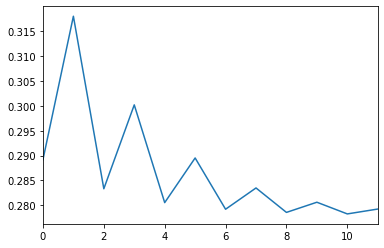

In [31]:
forecast_data['forecast_price'].plot()

In [32]:
def denormalize(df, normalized_value): 
    df = df['price'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    #return df.shape, p.shape
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

# newp = denormalize(data, pred_price)
# newy_test = denormalize(data, y_test)

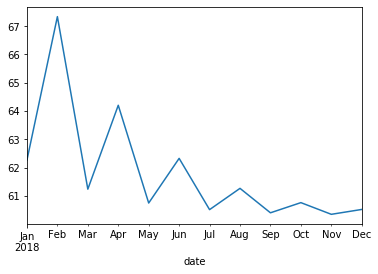

In [33]:
new_forecast = denormalize(data[:335], np.array(forecast_val))
forecast_data['forecast_price'] = new_forecast #denorm_price
forecast_data = forecast_data.set_index('date')
forecast_data.forecast_price.plot()

In [34]:
forecast_data

,forecast_price
date,
2018-01-31,62.266530
2018-02-28,67.332840
2018-03-31,61.238501
2018-04-30,64.201944
2018-05-31,60.749156
2018-06-30,62.326286
2018-07-31,60.515390
2018-08-31,61.266871
2018-09-30,60.403524


In [35]:
data[335:]['price'] #actual price

date
2018-01-31    75.78
2018-02-28    77.65
2018-03-31    71.32
2018-04-30    66.33
2018-05-31    66.63
2018-06-30    66.86
2018-07-31    67.05
2018-08-31    68.02
2018-09-30    68.80
2018-10-31    72.02
2018-11-30    72.30
2018-12-31    68.90
Name: price, dtype: float64

In [36]:
def forecast_accuracy(forecast, actual):
    mape=np.mean(np.abs(forecast-actual)/np.abs(actual))# MAPE
    me=np.mean(forecast-actual)# ME
    mae=np.mean(np.abs(forecast-actual))# MAE
    mpe=np.mean((forecast-actual)/actual)# MPE
    return({'mape':mape,'me':me,'mae': mae,'mpe': mpe})
print(forecast_accuracy(forecast_data.forecast_price.values, data[335:]['price'].values))
forecast_data['actual']=data[335:]['price'].values
forecast_data

{'mape': 0.11688952493897527, 'me': -8.31037063459555, 'mae': 8.31037063459555, 'mpe': -0.11688952493897527}


,forecast_price,actual
date,,
2018-01-31,62.266530,75.78
2018-02-28,67.332840,77.65
2018-03-31,61.238501,71.32
2018-04-30,64.201944,66.33
2018-05-31,60.749156,66.63
2018-06-30,62.326286,66.86
2018-07-31,60.515390,67.05
2018-08-31,61.266871,68.02
2018-09-30,60.403524,68.80


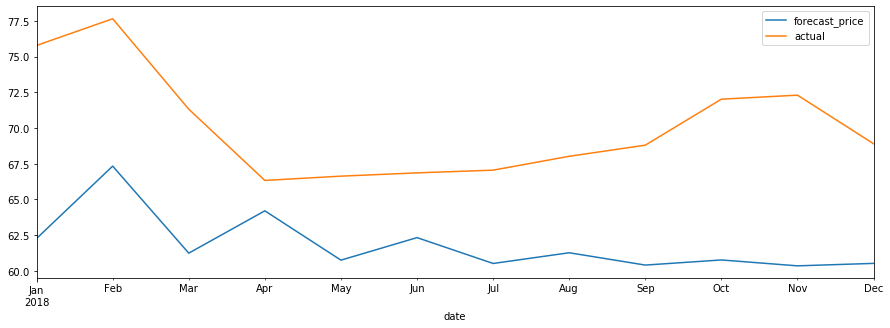

In [37]:
forecast_data.plot(figsize=(15,5))